# Data Selection and Objective definition

**Regression:California housing dataset**     
For regression, we used the California Housing dataset to predict housing prices.
Data from the 1990 census on California's housing districts are included in this dataset. It contains a number of characteristics, including population, households, median house value, average rooms per household, average bedrooms per household, median income, median age of housing, and more. For California districts, the goal variable is the median house value, which is a continuous number that indicates the median house price in that district. The remaining factors are all independent.


**Classification:Wine quality dataset**      
For classification, we used the Wine quality dataset to classify wine into different varities.
It includes characteristics related to several physicochemical characteristics of wine samples, including alcohol concentration, pH, acidity, and more, in addition to a human-assigned quality grade. These attributes include fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and quality rating. Usually, the assignment is to use these characteristics to divide wines into several quality groups.

# Data Preprocessing

**Importing all the necessary libraries**

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import NaN, NAN, nan
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

**READING THE DATA SETS**

In [122]:
dfreg=pd.read_csv('housing.csv')
dfclas=pd.read_csv('Wine.csv')

In [123]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**Regression**

**EXPLORING THE DATASET**

In [124]:
dfreg.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [126]:
dfreg.shape

(20640, 10)

In [127]:
dfreg.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [128]:
dfreg.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [129]:
dfreg.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [130]:
dfreg.duplicated().sum()

0

**CLEANING AND MODIFYING THE DATASET**

In [131]:
dfreg.dropna(inplace = True)

In [132]:
dfreg.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [133]:
dfreg['ocean_proximity'] = dfreg['ocean_proximity'].convert_dtypes()

In [134]:
dfreg.dtypes

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity       string[python]
dtype: object

In [136]:
dfreg = pd.concat([dfreg,pd.get_dummies(dfreg['ocean_proximity'])],axis =1)
dfreg.drop('ocean_proximity',axis =1,inplace=True)

**VISUALIZING THE DATASET**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

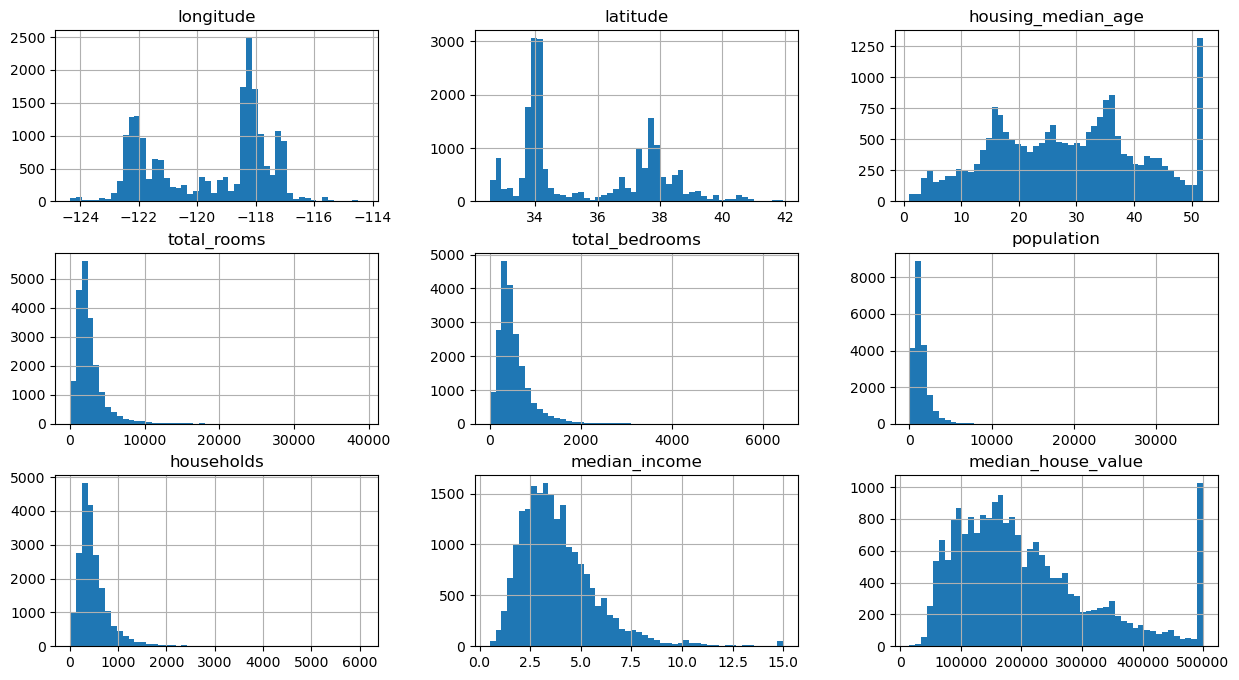

In [137]:
dfreg.hist(figsize=(15, 8),bins = 50)

<Axes: >

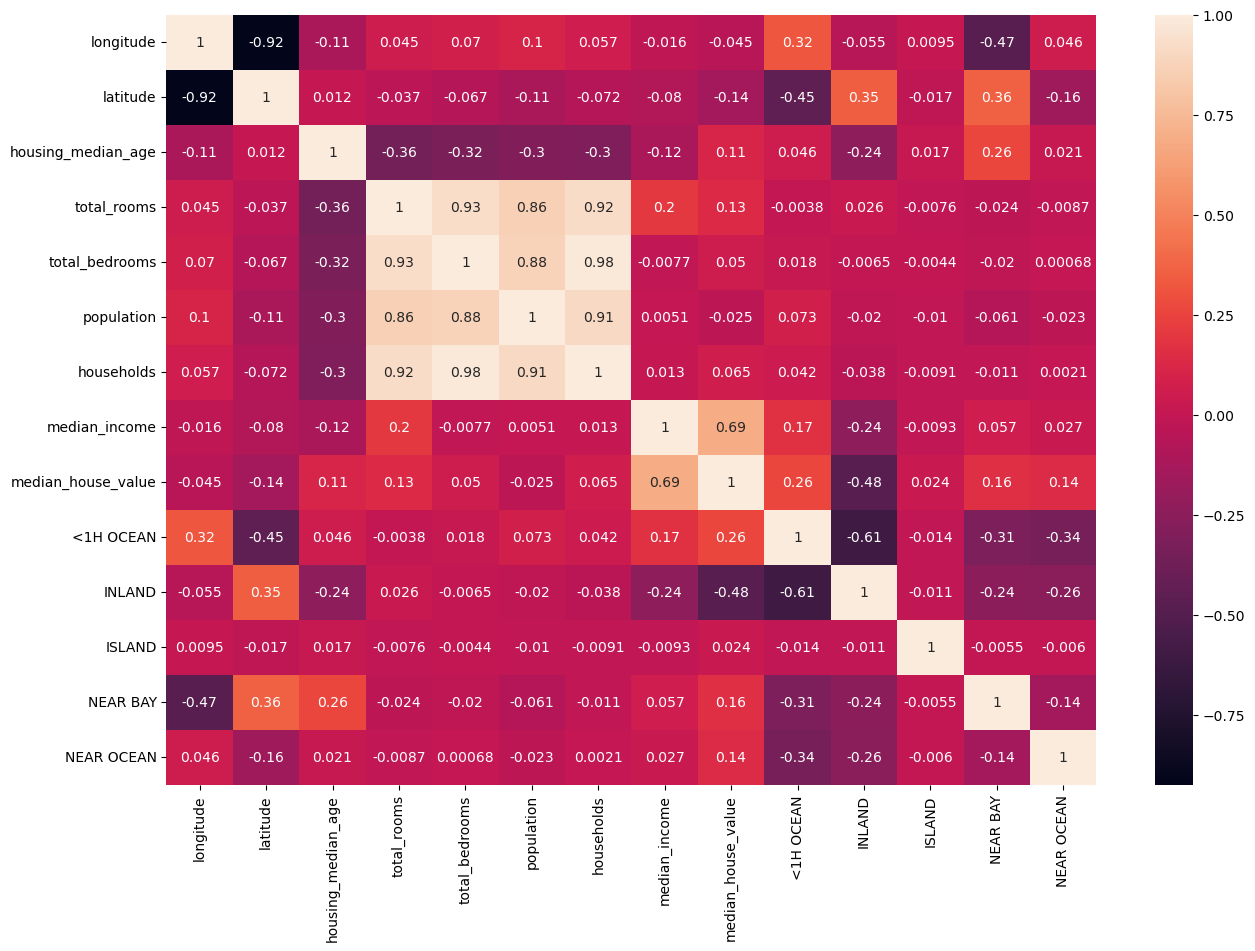

In [138]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(dfreg.corr(),annot =True)

------------------

**Classification**

**EXPLORING THE DATASET**

In [30]:
dfclas.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [31]:
dfclas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [32]:
dfclas.shape

(1143, 13)

In [33]:
dfclas.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [34]:
dfclas.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [35]:
dfclas.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [36]:
dfclas.duplicated().sum()

0

**CLEANING AND MODIFYING THE DATASET**

In [40]:
dfclas.drop('Id', axis =1,inplace=True)

In [61]:
dfclas.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
dfclas.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**VISUALIZING THE DATASET**

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

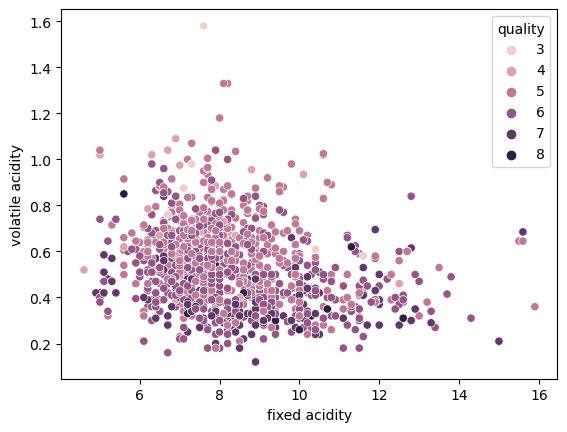

In [45]:
sns.scatterplot(data = dfclas, x = dfclas['fixed acidity'], y = 'volatile acidity', hue='quality')

<Axes: xlabel='citric acid', ylabel='residual sugar'>

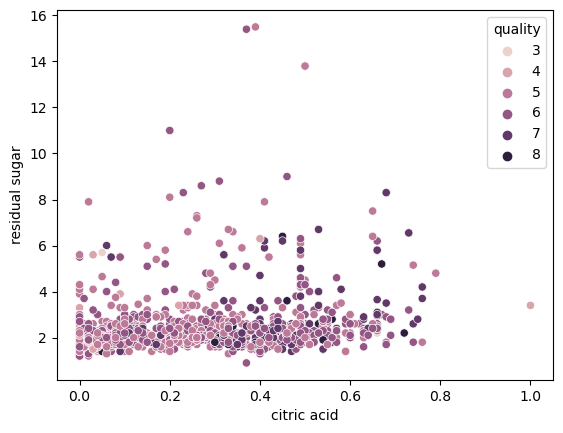

In [44]:
sns.scatterplot(data = dfclas, x = 'citric acid', y= dfclas['residual sugar'], hue = 'quality')

<Axes: >

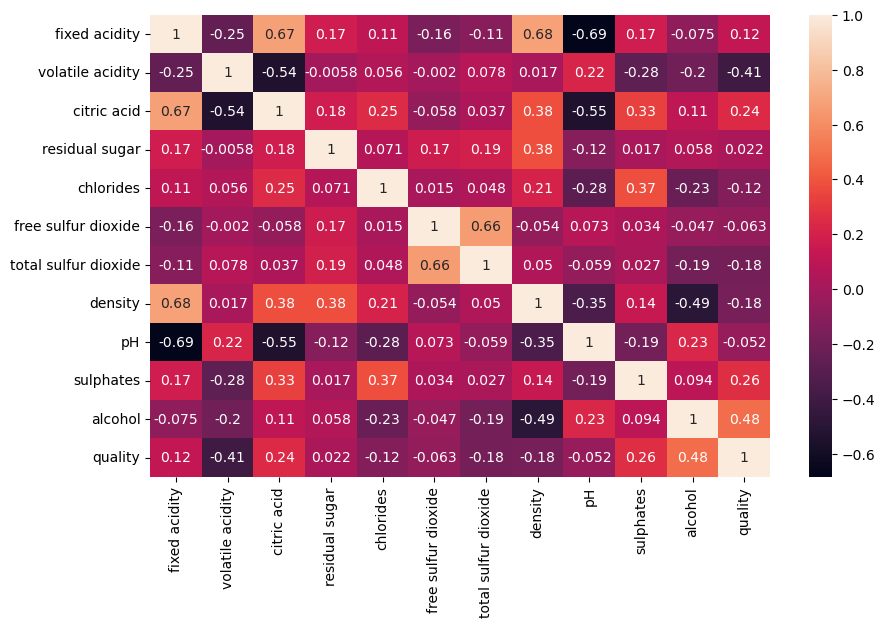

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(dfclas.corr(), annot=True)

----------------------------------

# Model Implementation


**Regression**

In [140]:
x = dfreg[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = dfreg['median_house_value']

In [141]:
X_trainreg, X_testreg, y_trainreg, y_testreg = train_test_split(x, y, test_size=0.2)

In [142]:
print(f'Shape of the X_train: {X_trainreg.shape}')
print(f'Shape of the X_test: {X_testreg.shape}')
print(f'Shape of the y_train: {y_trainreg.shape}')
print(f'Shape of the y_test: {y_testreg.shape}')

Shape of the X_train: (16346, 8)
Shape of the X_test: (4087, 8)
Shape of the y_train: (16346,)
Shape of the y_test: (4087,)


In [143]:
# Linear Regression
reg_lr=LinearRegression()
reg_lr.fit(x,y)

LinearRegression()

In [144]:
# Random Forest Regression
reg_rf = RandomForestRegressor()
reg_rf.fit(x, y)

RandomForestRegressor()

**Classification**

In [64]:
dfclas.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [70]:
X_col= dfclas.columns[:-1]
y_col= dfclas.columns[-1]
Xc= dfclas[X_col] 
yc= dfclas[y_col]

In [71]:
X_traincla, X_testcla, y_traincla, y_testcla = train_test_split(Xc, yc, test_size = 0.2, random_state = 101)

In [72]:
print(f'Shape of the X_train: {X_traincla.shape}')
print(f'Shape of the X_test: {X_testcla.shape}')
print(f'Shape of the y_train: {y_traincla.shape}')
print(f'Shape of the y_test: {y_testcla.shape}')

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [80]:
#Logistic Regression
clasf_lr = LogisticRegression(max_iter=1000)
clasf_lr.fit(X_cla,yc)

LogisticRegression(max_iter=1000)

In [85]:
# Decision Trees
clasf_dt = DecisionTreeClassifier()
clasf_dt.fit(X_cla, yc)

DecisionTreeClassifier()

# Model Evaluation

**Regression**

**a.)Linear Regression**

In [145]:
y_pred = reg_lr.predict(X_testreg)
mae = mean_absolute_error(y_testreg, y_pred)
mape = mean_absolute_percentage_error(y_testreg,y_pred)
mse = mean_squared_error(y_testreg,y_pred)
r2 = r2_score(y_testreg, y_pred)


print("Mean Absolute Error:",round(mae,2))
print("Mean Absolute Percentage Error:",round(mape,2))
print("Mean Squared Error:" ,round(mse,2))
print("R-squared:",round(r2,2))

Mean Absolute Error: 49542.36
Mean Absolute Percentage Error: 0.29
Mean Squared Error: 4599803293.5
R-squared: 0.66


In [146]:
reg_lr.predict(X_testreg)

array([372567.12824957, 204129.94761535, 424349.94045961, ...,
       261416.26923297,  78235.95602152, 112570.04562607])

In [147]:
print("Training Accuracy :", reg_lr.score(X_trainreg, y_trainreg ))
print("Testing Accuracy :", reg_lr.score(X_testreg, y_testreg))

Training Accuracy : 0.6314040839638824
Testing Accuracy : 0.6584162962614553


**b.)Random Forest Regression**

In [160]:
y_predrf = reg_rf.predict(X_testreg)
mae = mean_absolute_error(y_testreg, y_pred)
mape = mean_absolute_percentage_error(y_testreg,y_pred)
mse = mean_squared_error(y_testreg,y_pred)
r2 = r2_score(y_testreg, y_pred)


print("Mean Absolute Error:",round(mae,2))
print("Mean Absolute Percentage Error:",round(mape,2))
print("Mean Squared Error:" ,round(mse,2))
print("R-squared:",round(r2,2))

Mean Absolute Error: 11346.13
Mean Absolute Percentage Error: 0.06
Mean Squared Error: 301268550.96
R-squared: 0.98


In [149]:
reg_rf.predict(X_testreg)

array([477305.78, 166956.  , 339216.02, ..., 248274.  ,  60076.  ,
        77609.  ])

In [150]:
print("Training Accuracy :", reg_rf.score(X_trainreg, y_trainreg ))
print("Testing Accuracy :", reg_rf.score(X_testreg, y_testreg))

Training Accuracy : 0.9748715920955004
Testing Accuracy : 0.9776276460336171


**Classification**

**a.)Logistic regression**

In [112]:
# Make predictions
pred = clasf_lr.predict(X_testcla)

In [113]:
accuracy = accuracy_score(y_testcla, pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_testcla, pred))
mod_pred_lr=clasf_lr.predict(X_testcla)
print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_testcla, mod_pred_lr)))


Accuracy: 0.3930131004366812
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.56      0.68      0.61       102
           6       0.44      0.04      0.08        91
           7       0.18      0.63      0.28        27
           8       0.00      0.00      0.00         2

    accuracy                           0.39       229
   macro avg       0.20      0.23      0.16       229
weighted avg       0.45      0.39      0.34       229

Confusion Matrix of the given Model: 
 [[ 0  0  0  0  1  0]
 [ 0  0  4  0  2  0]
 [ 0  0 69  3 30  0]
 [ 0  0 43  4 44  0]
 [ 0  0  8  2 17  0]
 [ 0  0  0  0  2  0]]


**b.)Decision tree**

In [114]:
# Make predictions
predictions = clasf_dt.predict(X_testcla)

In [171]:
accuracy = accuracy_score(y_testcla, predictions)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_testcla, predictions))
mod_pred_dt=clasf_dt.predict(X_testcla)
conf_mat=confusion_matrix(y_testcla, mod_pred_dt)
print("Confusion Matrix of the given Model: \n {}".format(conf_mat))


Accuracy: 0.44541484716157204
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.45      1.00      0.62       102
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.45       229
   macro avg       0.07      0.17      0.10       229
weighted avg       0.20      0.45      0.27       229

Confusion Matrix of the given Model: 
 [[  0   0   1   0   0   0]
 [  0   0   6   0   0   0]
 [  0   0 102   0   0   0]
 [  0   0  91   0   0   0]
 [  0   0  27   0   0   0]
 [  0   0   2   0   0   0]]


# Results Interpretation

**Regression**

In [188]:
scaler_reg=StandardScaler()
X_train_s = scaler_reg.fit_transform(X_trainreg)
reg_lr.fit(X_train_s, y_trainreg)
X_test_s = scaler_reg.transform(X_testreg)
y_pr=reg_lr.predict(X_test_s)

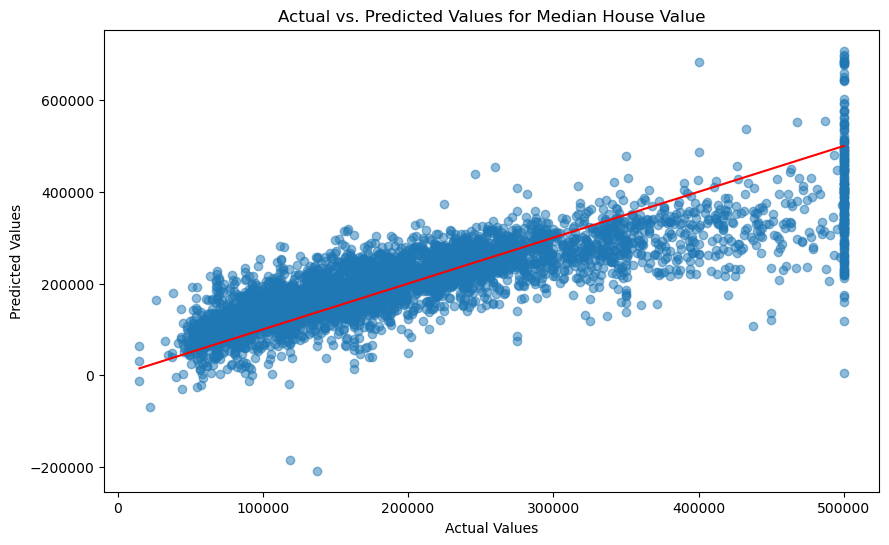

In [189]:
plt.figure(figsize=(10, 6))
plt.scatter(y_testreg, y_pr, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value')
plt.plot([min(y_testreg), max(y_testreg)], [min(y_testreg), max(y_testreg)], color='red') 
plt.show()

**Classifictaion**

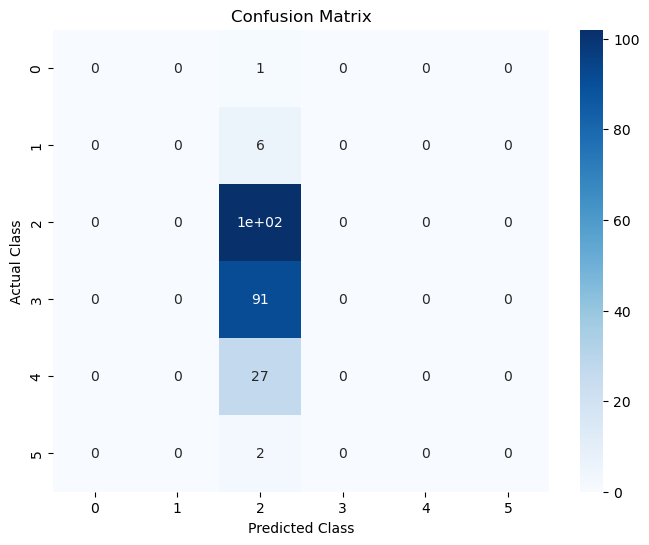

In [174]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

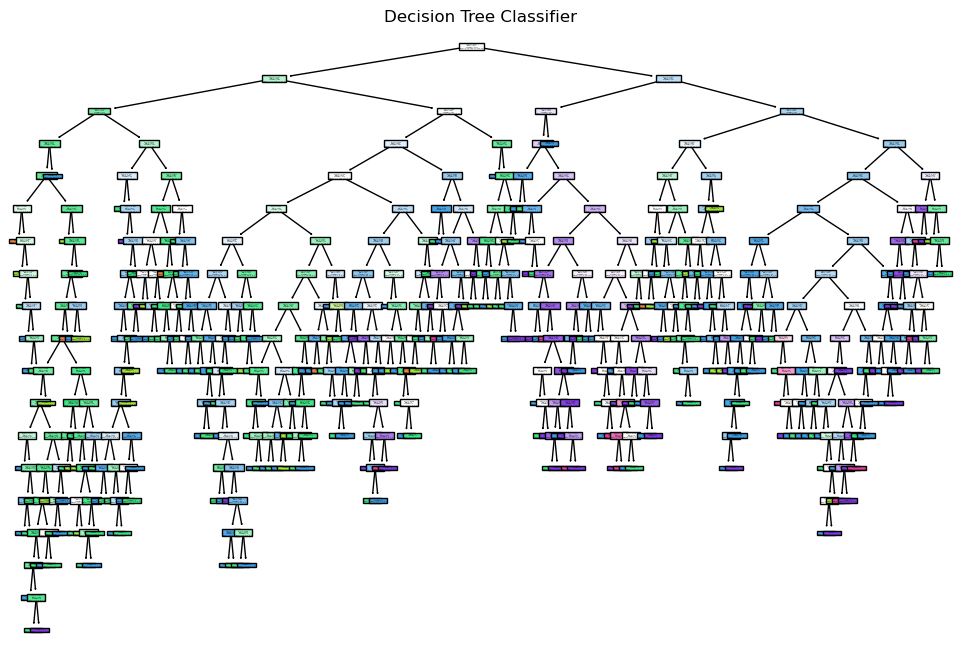

In [181]:
plt.figure(figsize=(12, 8))
plot_tree(clasf_dt, filled=True, feature_names=None)
plt.title('Decision Tree Classifier')
plt.show()

Interpretation of results is done in report